<a href="https://colab.research.google.com/github/HermanMoreno98/Machine_Learning/blob/main/Lab_Productos_a_plazo_fijo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 5>Caso venta de producto bancario</font></h1>

-----

## Tabla de Contenidos
    
1. <a href="#">Introducción</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre selección de variables</a>  
4. <a href="#item34">Muestreo</a>  
5. <a href="#item34">Tratamiento de variables</a>  
6. <a href="#item34">Regresión Logística</a>  
7. <a href="#item34">Calibración</a>  



# 1. Introduccion



Los datos corresponden a las llamadas telefónicas realizadas para la venta de un producto de ahorro a plazo fijo en una entidad bancaria. El objetivo de este problema de clasificación es predecir si el cliente aceptará o no el producto. Para este proyecto se debe tener en cuenta lo siguiente:

* Se cuenta con un conjunto de variables relacionadas al cliente en la campaña actual y también en campañas previas.
* El modelo construido será utilizado para definir el listado de clientes a priorizar en la siguiente campaña.
* Para las campañas que se lleven a cabo en los próximos meses, el cálculo del score de propensión se debe realizar al cierre del mes anterior al inicio de la campaña. Las campañas inician los primeros días hábiles de cada mes.
* El objetivo principal del score de propensión a desarrollar, es que debe permitir disminuir los costos de las campañas sin reducir el nivel de ventas (costo promedio por llamada de $1 USD).

El dataframe tiene 31478 filas y 21 columnas.

Este dataframe tiene las siguientes columns:

---

|Variable|Descripcion|
|--------|-----------|
|ID|código identificador del cliente|
|EDAD|edad del cliente|
|TRABAJO|tipo de trabajo que desempeña el cliente|
|ESTADO_CIVIL|estado civil|
|EDUCACION|nivel educativo|
|INCUMPLIMIENTO|¿tiene un crédito incumplido en el pasado?|
|VIVIENDA|¿tiene un crédito hipotecario?|
|PRESTAMO|¿tiene un préstamo personal?|
|TIPO_CONTACTO|tipo de contacto registrado en la base de datos|
|MES|Mes en el cual se llevó a cabo la campaña evaluada.|
|CAMPANA|cantidad de contactos telefónicos que se tuvieron con el cliente en los últimos 6 meses previos al inicio de la campaña.|
|NRO_DIAS_CONTACTO|número de días que pasaron desde el último contacto de la campaña anterior|
|CONTACTOS_PREVIOS|número de contactos telefónicos realizados en la campaña previa|
|RESULT_PREVIO|resultado de la campaña anterior|
|TASA_VAR_EMP|Variable macroeconómica - tasa de variación del empleo|
|IPC|Variable macroeconómica - indice de precios al consumidor al mes previo.|
|ICC|Variable macroeconómica - indice de confianza del consumidor al mes previo.|
|INGRESO|ingresos netos al mes previo.|
|MONTO_DEUDA|monto de la deuda total de cliente al mes previo.|
|MONTO_TRANSAC|monto de las transacciones de tarjeta de crédito del mes anterior|
|ACEPTACION|variable target: resultado de la campaña actual (acepta=1, rechaza=0)|

---

# 2. Descargar y limpiar el dataset

In [ ]:
# Importando librerias

# Scikit-learn
import sklearn

import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid",color_codes=True)
sns.set(rc={"figure.figsize":(10,6)})

# Ignorar los warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Seteando Ruta del dataset en google drive
base_train = '/content/drive/MyDrive/CURSOS/COMPETENCIAS KAGGLE/DATA/base_train.csv'
base_test = '/content/drive/MyDrive/CURSOS/COMPETENCIAS KAGGLE/DATA/base_test_x.csv'

# Leyendo dataset
data = pd.read_csv(base_train, delimiter=',')
test_fin = pd.read_csv(base_test, delimiter=',')
target = 'ACEPTACION'

# Pre procesamiento de los datos

In [ ]:
# Reemplazando valores incorrectos en la variable 'estado_civil
data.ESTADO_CIVIL = data.ESTADO_CIVIL.replace(['singgle','single ','singgle '],'single')
data.ESTADO_CIVIL = data.ESTADO_CIVIL.replace(['marrid',' married ',' married'],'married')
data.ESTADO_CIVIL = data.ESTADO_CIVIL.replace(['divorced ','d_ivorced'],'divorced')

In [ ]:
test_fin.ESTADO_CIVIL = test_fin.ESTADO_CIVIL.replace(['singgle','single ','singgle '],'single')
test_fin.ESTADO_CIVIL = test_fin.ESTADO_CIVIL.replace(['marrid',' married ',' married'],'married')
test_fin.ESTADO_CIVIL = test_fin.ESTADO_CIVIL.replace(['divorced ','d_ivorced'],'divorced')

In [ ]:
data['EDUCACION']=np.where(data['EDUCACION'] =='basic.9y','Basic', data['EDUCACION'])
data['EDUCACION']=np.where(data['EDUCACION'] =='basic.6y','Basic', data['EDUCACION'])
data['EDUCACION']=np.where(data['EDUCACION'] =='basic.4y','Basic', data['EDUCACION'])

In [ ]:
test_fin['EDUCACION']=np.where(test_fin['EDUCACION'] =='basic.9y','Basic', test_fin['EDUCACION'])
test_fin['EDUCACION']=np.where(test_fin['EDUCACION'] =='basic.6y','Basic', test_fin['EDUCACION'])
test_fin['EDUCACION']=np.where(test_fin['EDUCACION'] =='basic.4y','Basic', test_fin['EDUCACION'])

In [ ]:
# La variable tiene muchos valores '999', se debe retirar
data.NRO_DIAS_CONTACTO.value_counts()

999    30316
3        342
6        323
4         96
2         49
12        47
7         47
9         46
10        40
5         34
13        24
15        19
1         17
11        15
14        15
0         13
8         11
17         7
16         7
18         4
19         2
22         2
21         1
27         1
Name: NRO_DIAS_CONTACTO, dtype: int64

# Analisis exploratiorio de datos

## Data categorica

In [ ]:
data.groupby(['TRABAJO']).agg({
    'ID':'count',
    'EDAD':'mean',
    'MONTO_DEUDA':'mean',
    'MONTO_TRANSAC':'mean',
    'ACEPTACION':'mean',
    'NRO_DIAS_CONTACTO':'mean',
    'CONTACTOS_PREVIOS':'mean'
}).reset_index().sort_values(by='ACEPTACION', ascending=False)

,TRABAJO,ID,EDAD,MONTO_DEUDA,MONTO_TRANSAC,ACEPTACION,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS
8,student,637,26.196232,20449.422214,5007.631790,0.320251,827.626374,0.560440
5,retired,1330,61.875940,19699.619452,5022.906300,0.256391,896.663910,0.339098
10,unemployed,770,39.675325,20160.206783,5020.602338,0.137662,933.224675,0.219481
0,admin.,7958,38.641870,19945.659464,4998.495252,0.133576,953.703694,0.189244
11,unknown,254,45.484252,20539.348810,5091.284285,0.114173,944.216535,0.145669
9,technician,5147,38.837381,19934.460310,4956.430176,0.107830,963.508452,0.160093
4,management,2233,42.901926,19959.106953,4959.845604,0.106135,967.847738,0.166592
6,self-employed,1110,40.761261,19975.490174,5041.037052,0.103604,972.140541,0.140541
3,housemaid,814,46.148649,20381.742117,5118.913896,0.095823,956.277641,0.147420
2,entrepreneur,1103,41.997280,19889.165636,5029.156232,0.078876,986.396192,0.129646


<Axes: xlabel='count', ylabel='EDUCACION'>

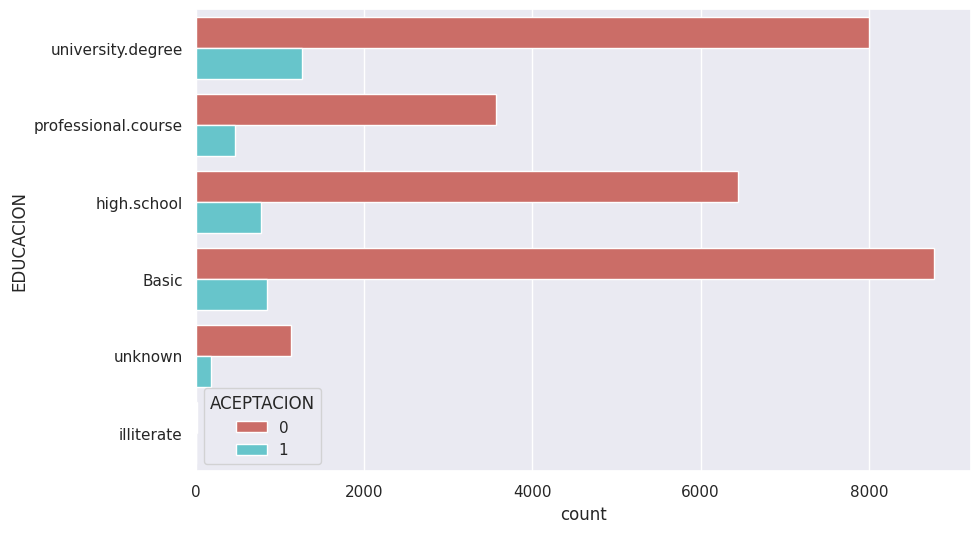

In [ ]:
sns.countplot(y = 'EDUCACION', hue='ACEPTACION', data=data, palette='hls')

<Axes: xlabel='ESTADO_CIVIL', ylabel='count'>

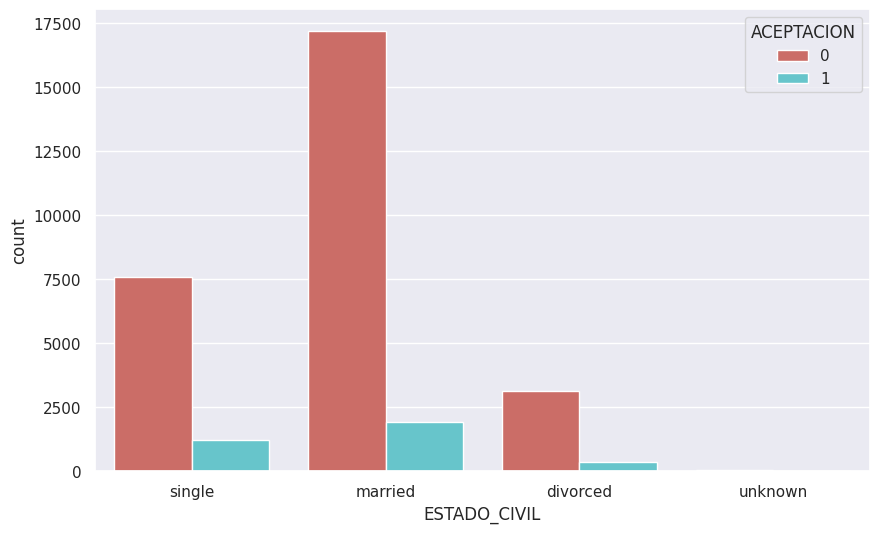

In [ ]:
sns.countplot(x = 'ESTADO_CIVIL', hue='ACEPTACION', data=data, palette='hls')

<Axes: xlabel='count', ylabel='TRABAJO'>

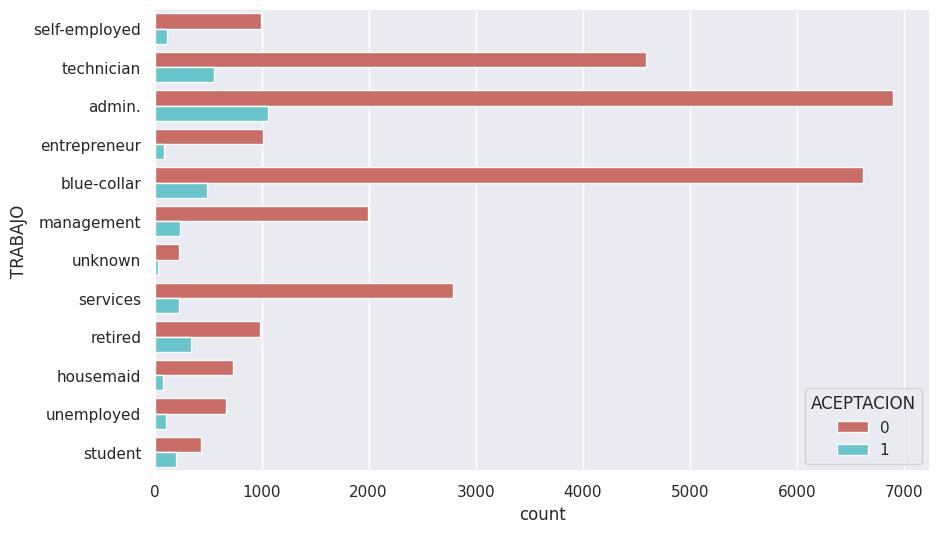

In [ ]:
sns.countplot(y = 'TRABAJO', hue='ACEPTACION', data=data, palette='hls')

<Axes: xlabel='INCUMPLIMIENTO', ylabel='count'>

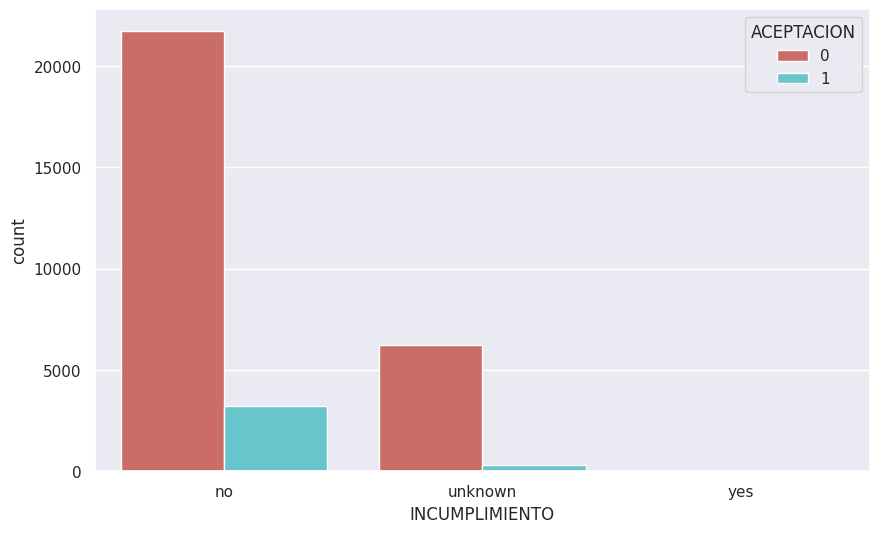

In [ ]:
sns.countplot(x = 'INCUMPLIMIENTO', hue='ACEPTACION', data=data, palette='hls')

<Axes: xlabel='VIVIENDA', ylabel='count'>

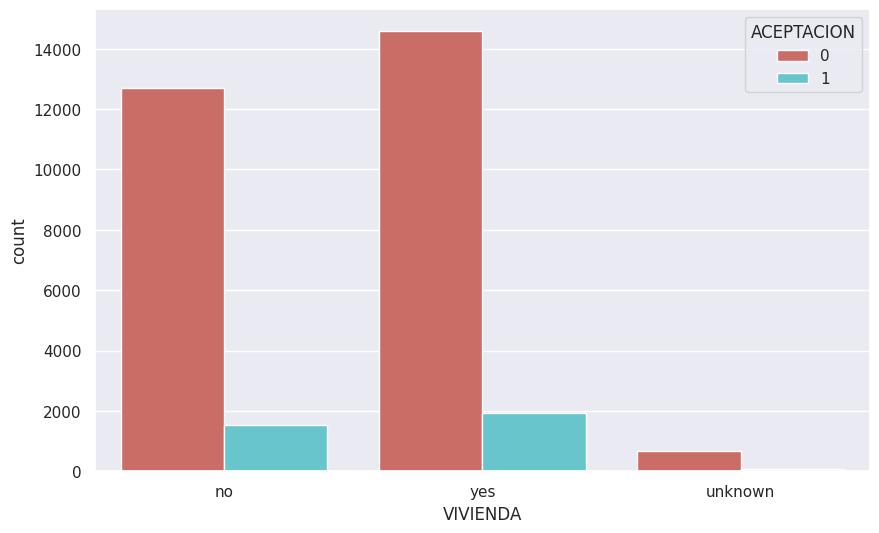

In [ ]:
sns.countplot(x = 'VIVIENDA', hue='ACEPTACION', data=data, palette='hls')

<Axes: xlabel='PRESTAMO', ylabel='count'>

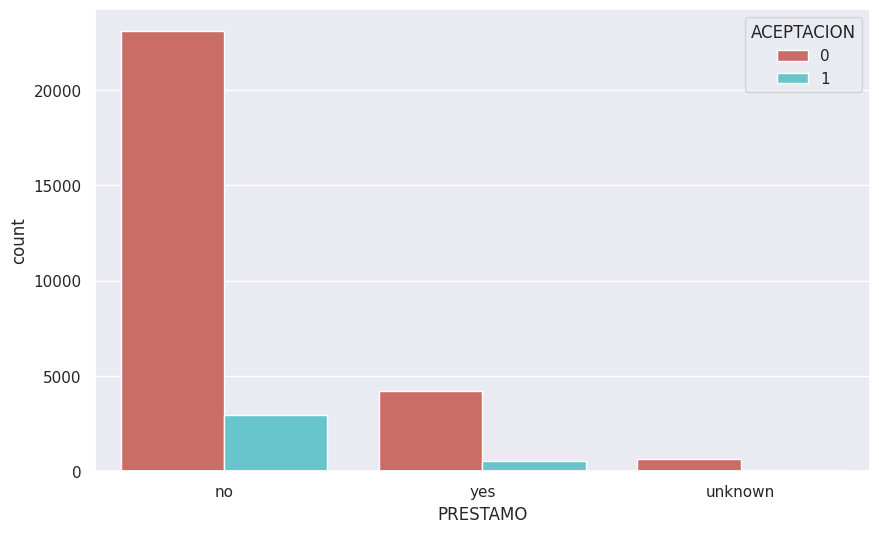

In [ ]:
sns.countplot(x = 'PRESTAMO', hue='ACEPTACION', data=data, palette='hls')

<Axes: xlabel='TIPO_CONTACTO', ylabel='count'>

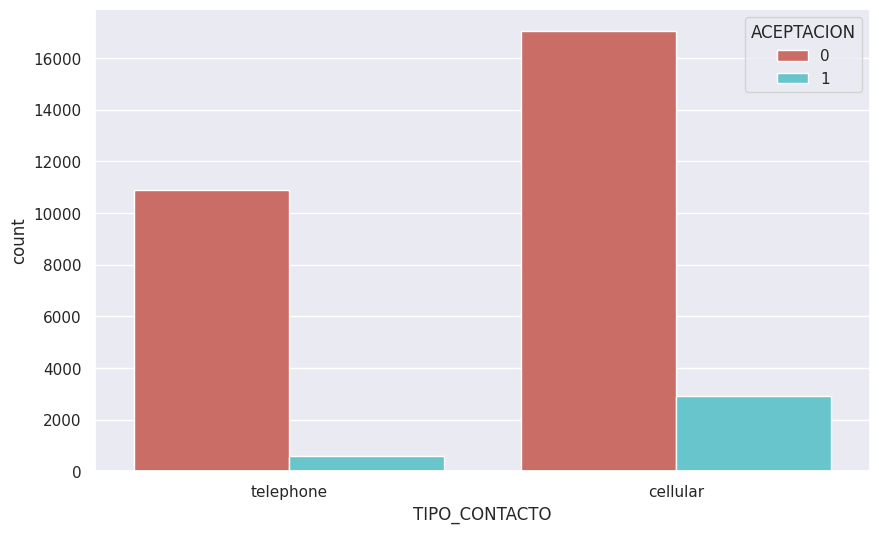

In [ ]:
sns.countplot(x = 'TIPO_CONTACTO', hue='ACEPTACION', data=data, palette='hls')

## Data numerica

<Axes: xlabel='EDAD', ylabel='Count'>

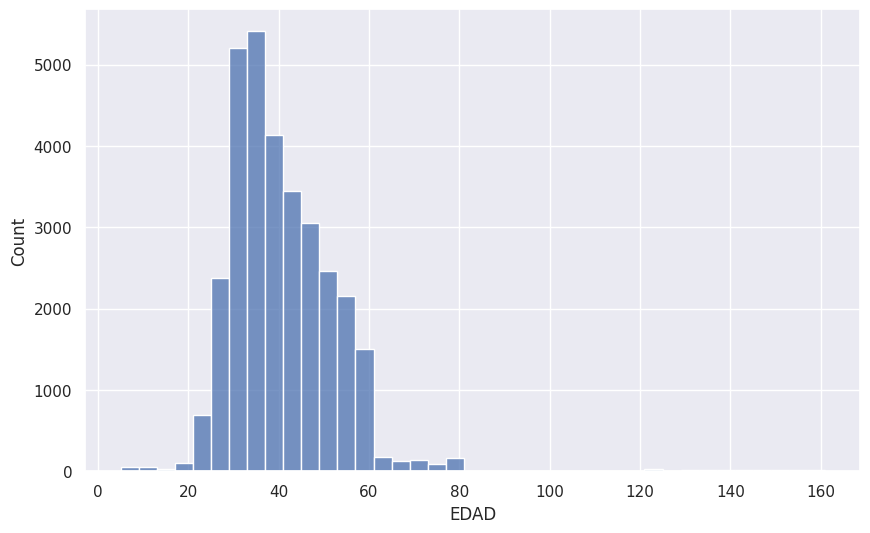

In [ ]:
sns.histplot(data=data, x='EDAD', binwidth=4)

<Axes: xlabel='EDAD'>

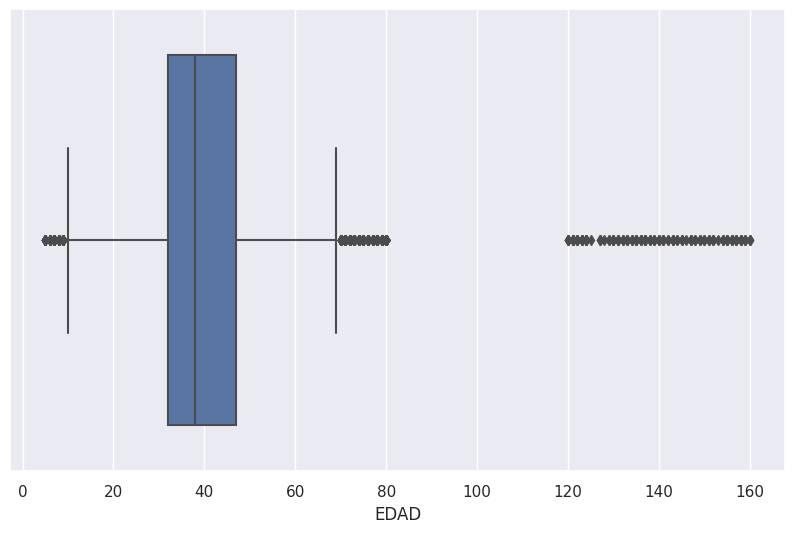

In [ ]:
sns.boxplot(data=data, x='EDAD')

# 3. Seleccionando columnas por categorica y analizando el target

In [ ]:
# Variables categoricas
catFeatures = data.select_dtypes('object').columns.tolist()

# Variables categoricas
catFeatures_test = test_fin.select_dtypes('object').columns.tolist()

In [ ]:
# Variables numericas
numFeatures = list(set(data.columns.tolist()) - set(catFeatures + ['ID','ACEPTACION']))

numFeatures_test = list(set(test_fin.columns.tolist()) - set(catFeatures_test + ['ID']))

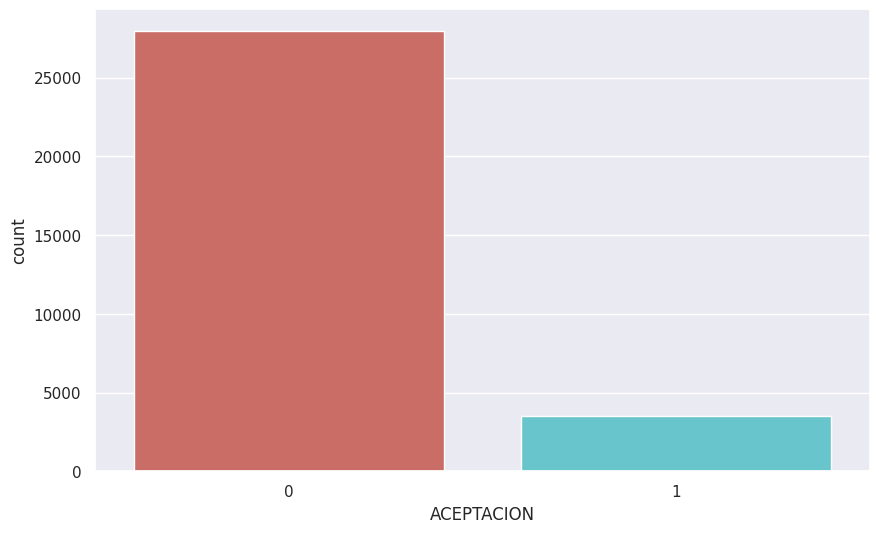

In [ ]:
# Analizando el target (Hay desbalanceo de muestra)
sns.countplot(x="ACEPTACION",data=data,palette="hls")
plt.show()

In [ ]:
# El 11% de los clientes aceptaron el producto de ahorro
data.ACEPTACION.mean()

0.11226888620623927

In [ ]:
data.ACEPTACION.value_counts(normalize=True)

0    0.887731
1    0.112269
Name: ACEPTACION, dtype: float64

# Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder = OneHotEncoder(sparse_output=True)

OneHotEncoder.fit(data[catFeatures])

data[OneHotEncoder.get_feature_names_out(catFeatures)] = OneHotEncoder.transform(data[catFeatures]).toarray()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder(sparse_output=True)

OneHotEncoder.fit(test_fin[catFeatures])

test_fin[OneHotEncoder.get_feature_names_out(catFeatures_test)] = OneHotEncoder.transform(test_fin[catFeatures_test]).toarray()

In [ ]:
features = list(set(data.columns.tolist()) - set(['ID','TRABAJO',
 'ESTADO_CIVIL',
 'EDUCACION',
 'INCUMPLIMIENTO',
 'VIVIENDA',
 'PRESTAMO',
 'TIPO_CONTACTO',
 'MES','RESULT_PREVIO']))


features_test = list(set(test_fin.columns.tolist()) - set(['ID','TRABAJO',
 'ESTADO_CIVIL',
 'EDUCACION',
 'INCUMPLIMIENTO',
 'VIVIENDA',
 'PRESTAMO',
 'TIPO_CONTACTO',
 'MES','RESULT_PREVIO']))

In [ ]:
#Do the logarithm trasnformations for required features
from sklearn.preprocessing import FunctionTransformer
logarithm_transformer = FunctionTransformer(np.log1p, validate=True)
# apply the transformation to your data
columns = ['EDAD', 'CAMPANA', 'CONTACTOS_PREVIOS']
to_right_skewed = logarithm_transformer.transform(data[columns])
data['EDAD'] = to_right_skewed[:, 0]
data['CAMPANA'] = to_right_skewed[:, 1]
data['CONTACTOS_PREVIOS'] = to_right_skewed[:, 2]

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
df = pd.DataFrame(data, columns=['EDAD'])
# fit the scaler to the  data
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
discretizer.fit(df)
_discretize = discretizer.transform(df)
x = pd.DataFrame(_discretize, columns=['EDAD'])
data['EDAD'] = x['EDAD']

# 4. Muestreo

In [ ]:
# Determinando matrices de datos
X = data[features]
y = data.ACEPTACION

In [ ]:
# Muestreo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                               stratify = y,
                               train_size = 0.7,
                               random_state = 123)

In [ ]:
y_train.mean()

0.11228102024144504

In [ ]:
y_test.mean()

0.11224057602710716

# OVERSAMPLING - SMOTE

<Axes: ylabel='count'>

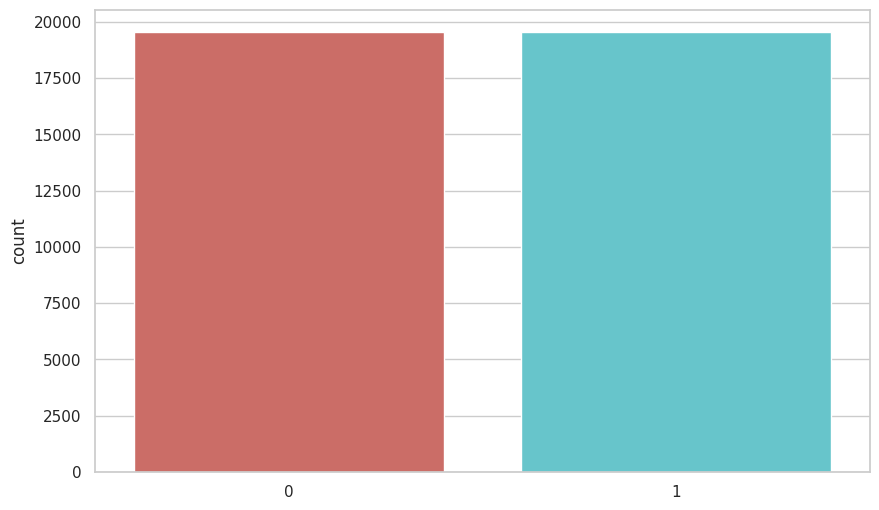

In [ ]:
# Aplicando SMOTE para oversampling

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Analizando el target
sns.countplot(x = y_train_res, palette = 'hls')

In [ ]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)
rfe = rfe.fit(X_train_res, y_train_res.ravel())

print(rfe.support_)


print(rfe.ranking_)

In [ ]:
selected_columns = X_train_res.columns[rfe.support_]

In [ ]:
selected_columns = ['TASA_VAR_EMP', 'TRABAJO_blue-collar', 'RESULT_PREVIO_failure',
       'MES_aug', 'TRABAJO_services', 'CONTACTOS_PREVIOS', 'CAMPANA',
       'MES_sep', 'INCUMPLIMIENTO_unknown', 'MES_jul', 'MES_nov',
       'TRABAJO_retired', 'MES_may', 'MES_apr',
       'TRABAJO_student', 'ESTADO_CIVIL_single', 'RESULT_PREVIO_nonexistent',
       'RESULT_PREVIO_success', 'MES_mar']

selected_columns_test = ['TASA_VAR_EMP', 'TRABAJO_blue-collar', 'RESULT_PREVIO_failure',
       'MES_aug', 'TRABAJO_services', 'CONTACTOS_PREVIOS', 'CAMPANA',
       'MES_sep', 'INCUMPLIMIENTO_unknown', 'MES_jul', 'MES_nov',
       'TRABAJO_retired', 'MES_may', 'MES_apr',
       'TRABAJO_student', 'ESTADO_CIVIL_single', 'RESULT_PREVIO_nonexistent',
       'RESULT_PREVIO_success', 'MES_mar']

In [ ]:
X = X_train_res[selected_columns]
y = y_train_res

# Regresion logistica

In [ ]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)


res=logit_model.fit()


print(res.summary2())

Optimization terminated successfully.
         Current function value: 0.523960
         Iterations 7
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.244     
Dependent Variable:    y                   AIC:                 41032.5959
Date:                  2023-07-17 20:08    BIC:                 41195.5093
No. Observations:      39120               Log-Likelihood:      -20497.   
Df Model:              18                  LL-Null:             -27116.   
Df Residuals:          39101               LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        7.0000                                             
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
TASA_VAR_EMP              -0

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

print('‘Accuracy of logistic regression classifier on test set: {:.2f}’'.format(logreg.score(X_test, y_test)))

‘Accuracy of logistic regression classifier on test set: 0.76’


In [ ]:
y_pred_test = logreg.predict(test_fin[selected_columns_test])

In [ ]:
test_fin['ACEPTACION'] = np.array(y_pred_test)

In [ ]:
test_fin[['ID','ACEPTACION']].to_csv('LOGIT.csv',index=False)

In [ ]:
test_fin['ACEPTACION'].mean()

0.21971567208649018

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[4900 1001]
 [1816 4019]]


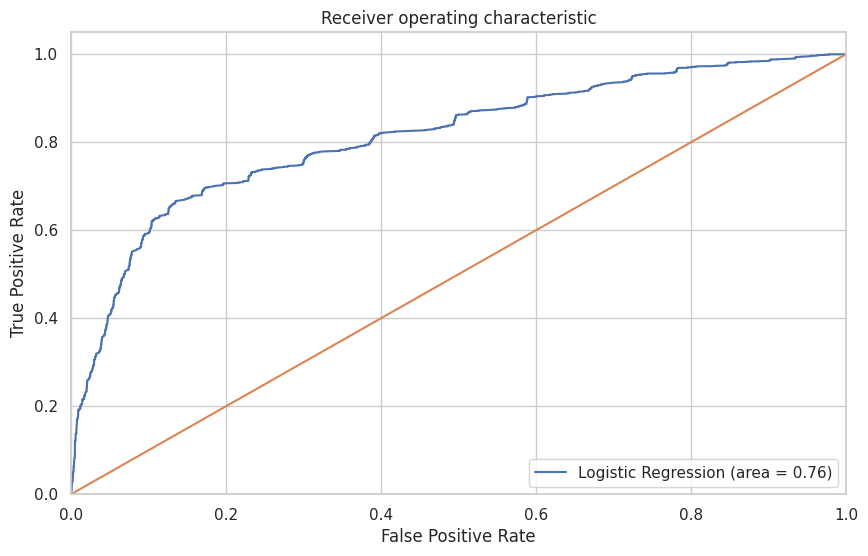

In [ ]:
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# Analizando los parámetros del modelo

modelo = pd.DataFrame({'coeficiente' : res.params})
modelo.reset_index(inplace = True)
modelo.rename(columns = {'index': 'feature'}, inplace = True)
modelo = modelo.loc[modelo.feature != 'const']
modelo['peso'] = abs(modelo.coeficiente)/abs(modelo.coeficiente).sum()
modelo.sort_values(by = 'peso', ascending = False, inplace = True)
modelo

,feature,coeficiente,peso
17,RESULT_PREVIO_success,3.886706,0.295130
18,MES_mar,1.167974,0.088688
5,CONTACTOS_PREVIOS,-1.001711,0.076063
12,MES_may,-0.879434,0.066778
2,RESULT_PREVIO_failure,0.822113,0.062426
10,MES_nov,-0.713249,0.054159
14,TRABAJO_student,0.689831,0.052381
3,MES_aug,0.594393,0.045134
0,TASA_VAR_EMP,-0.495140,0.037598
9,MES_jul,0.491961,0.037356


In [ ]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.Logit(y_train, sm.add_constant(X_train))
res = mod.fit()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.524709
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                27384
Model:                          Logit   Df Residuals:                    27365
Method:                           MLE   Df Model:                           18
Date:                Mon, 17 Jul 2023   Pseudo R-squ.:                  0.2430
Time:                        20:18:03   Log-Likelihood:                -14369.
converged:                       True   LL-Null:                       -18981.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.1931   5.27e+05   2.26e-06      1.000   -1.03e

In [ ]:
import statsmodels.api as sm
# Método Backward

mod_features = list(set(X_train.columns.tolist()) - set(['RESULT_PREVIO_nonexistent']))

# Fit and summarize OLS model
mod = sm.Logit(y_train, sm.add_constant(X_train[mod_features]))
res = mod.fit()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.524709
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                27384
Model:                          Logit   Df Residuals:                    27365
Method:                           MLE   Df Model:                           18
Date:                Mon, 17 Jul 2023   Pseudo R-squ.:                  0.2430
Time:                        20:18:25   Log-Likelihood:                -14369.
converged:                       True   LL-Null:                       -18981.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2608      0.039      6.620      0.000       0.184      

# Calibracion

In [ ]:
# Usando el modelo para predecir

X['probability'] = res.predict(sm.add_constant(X[mod_features]))
X_test['probability']  = res.predict(sm.add_constant(X_test[mod_features]))

X['prediction'] = X['probability'].apply(lambda x: 1 if x >= 0.5 else 0)
X_test['prediction']  = X_test['probability'].apply(lambda x: 1 if x >= 0.5 else 0)

X_test['ACEPTACION'] = y_test

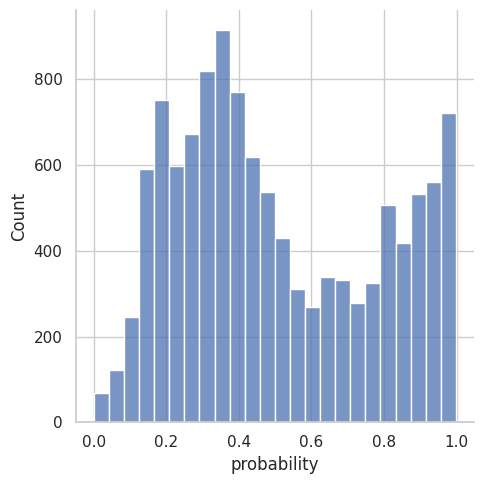

In [ ]:
sns.displot(X_test, x="probability", fill=True)

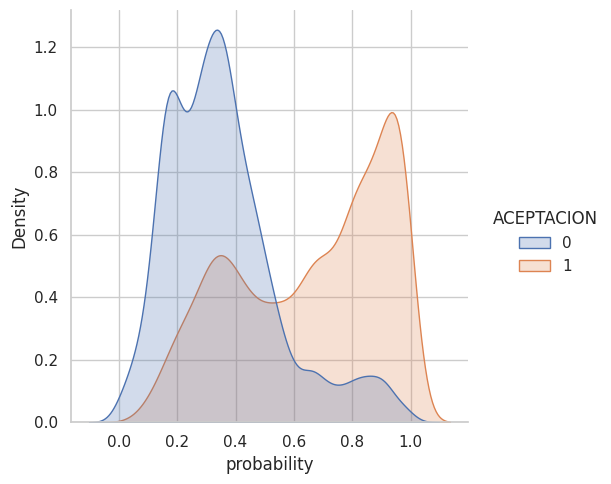

In [ ]:
sns.displot(X_test, x="probability", hue = 'ACEPTACION', kind="kde", fill=True)

In [ ]:
from sklearn.metrics import *

def plot_roc_curve(y_true, y_score, filepath=None, line_width=2, width=12,
                   height=10, title=None, colors=("#FF0000", "#000000")):
    """
    Saves a ROC curve in a file or shows it on screen.
    :param y_true: actual values of the response (list|np.array)
    :param y_score: predicted scores (list|np.array)
    :param filepath: if given, the ROC curve is saved in the desired filepath. It should point to a png file in an
    existing directory. If not specified, the curve is only shown (str)
    :param line_width: number indicating line width (float)
    :param width: number indicating the width of saved plot (float)
    :param height: number indicating the height of saved plot (float)
    :param title: if given, title to add to the top side of the plot (str)
    :param colors: color specification for ROC curve and diagonal respectively (tuple of str)
    :return: None
    """
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_score)
    gini = auc(fpr, tpr) * 2 - 1

    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(width, height))
    major_ticks = np.arange(0, 1.1, 0.1)
    minor_ticks = np.arange(0.05, 1, 0.1)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which="both", axis="both")
    ax.grid(which="minor", alpha=0.2)
    ax.grid(which="major", alpha=0.5)
    ax.tick_params(which="major", direction="out", length=5)
    plt.plot(fpr, tpr, color=colors[0], lw=line_width,
                   label="ROC curve (gini = {:.2f})".format(gini))
    plt.plot([0, 1], [0, 1], color=colors[1], lw=line_width, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel("False positive rate", fontsize=15)
    plt.ylabel("True positive rate", fontsize=15)
    if title:
        plt.title(title, fontsize=30, loc="left")
    plt.legend(loc="lower right", frameon=True, fontsize="large",
                     fancybox=True)
    plt.tight_layout()
    if filepath:
        plt.savefig(filepath, dpi=200)
        plt.close()
    else:
        plt.show()

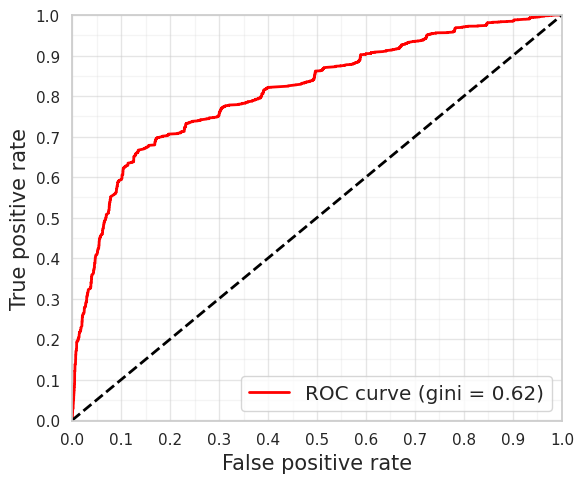

In [ ]:
plot_roc_curve(y_test, X_test.probability, width=6, height=5)

In [ ]:
#Resumen de todas las métricas del modelo

metricsLogisitc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'logistic_train':[roc_auc_score(y, X.probability),
                                        (roc_auc_score(y, X.probability)*2-1),
                                        accuracy_score(y, X.prediction),
                                        precision_score(y, X.prediction),
                                        recall_score(y, X.prediction),
                                        f1_score(y, X.prediction)],

                                'logistic_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsLogisitc

,metric,logistic_train,logistic_test
0,AUC,0.812829,0.812309
1,Gini,0.625657,0.624618
2,Accuracy,0.760020,0.759458
3,Precision,0.806164,0.800120
4,Recall,0.684663,0.688089
5,F1-score,0.740462,0.739888


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

X_test['probability_rank'] = KBinsDiscretizer(n_bins = 6,
                                              encode = 'ordinal',
                                              strategy = "uniform").fit_transform(X_test[['probability']])

aggregations = {'prediction':'count','probability':'max','ACEPTACION':'mean'}
res = X_test.groupby('probability_rank').agg(aggregations).reset_index()

pddf1 = pd.DataFrame({'probability_rank':X_test.probability_rank,
                      'value':X_test.probability,
                     'type': 'probability_mean'})

pddf2 = pd.DataFrame({'probability_rank':X_test.probability_rank,
                      'value':X_test.ACEPTACION,
                     'type': 'ACEPTACION_rate'})

pddf = pddf1.append(pddf2)

<Axes: xlabel='probability_rank', ylabel='value'>

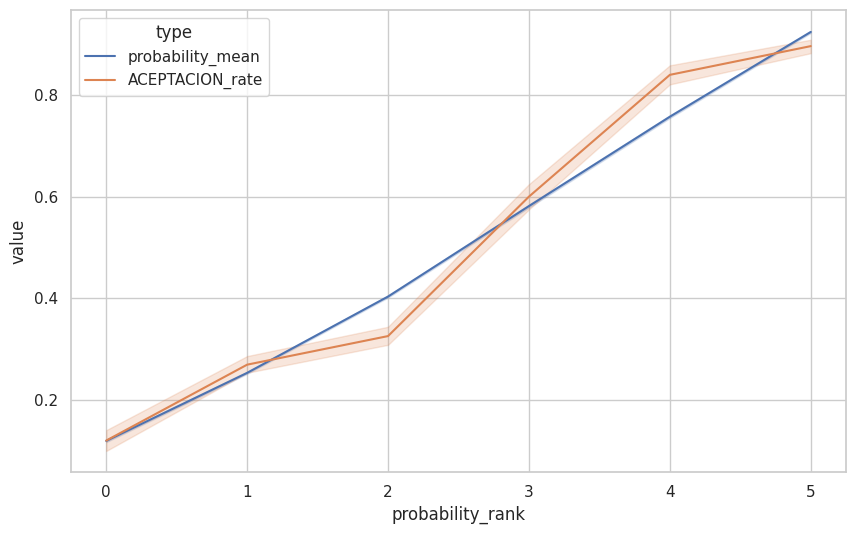

In [ ]:
# Ratio del evento por tramo dela variable numérica

sns.lineplot(data=pddf.reset_index(), x="probability_rank", y="value", hue="type", markers=True, dashes=False)